# **ARIMA modeling for indexes and target**

**RELEASE**


In [ ]:
REL = '_R004'

## **Importing libraries and connecting disk, global ads**

Collecting own modules

In [ ]:
import sys
sys.path.append('/gdrive/My Drive/Release')
import Modules.global_f as mgf

Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

import datetime

from pylab import rcParams
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_squared_error

from statsmodels.tsa.arima_model import ARIMA

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Connecting disk

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


##**Task implementation**

**Data path**

In [ ]:
DATA_PATH = '/gdrive/My Drive/Data/'

**Data loading**

In [ ]:
df = pd.read_csv(DATA_PATH + 'Data_Cleaner_!!clear!!' + REL +'.csv', parse_dates=[0])

# taking indexes data
df.drop(df.columns[2:43], axis=1, inplace=True)
df.drop(df.columns[38:], axis=1, inplace=True)
df.info(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023 entries, 0 to 2022
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 2023 non-null   datetime64[ns]
 1   price                2023 non-null   float64       
 2   dow-jones            2023 non-null   float64       
 3   s-p-500              2023 non-null   float64       
 4   dax                  2023 non-null   float64       
 5   nasdaq-composite     2023 non-null   float64       
 6   ftse-100             2023 non-null   float64       
 7   cac-40               2023 non-null   float64       
 8   nikkei-225           2023 non-null   float64       
 9   sse-composite        2023 non-null   float64       
 10  hang-seng            2023 non-null   float64       
 11  kospi                2023 non-null   float64       
 12  bse-sensex           2023 non-null   float64       
 13  bovespa              2023 non-nul

In [ ]:
df.head()

,Date,price,dow-jones,s-p-500,dax,nasdaq-composite,ftse-100,cac-40,nikkei-225,sse-composite,hang-seng,kospi,bse-sensex,bovespa,merval,vix-index,индекс-мосбиржи,bitcoin,ifx-cbonds,ртс,нефть-brent,msci-world-index,s-p_tsx-composite,asx-200,kase-(казахстан),ux-(украина),золото-(лондон),серебро-(лондон),платина-(лондон),палладий-(лондон),LIBOR USD,LIBOR EUR,LIBOR GBP,LIBOR CHF,LIBOR JPY,morgan-stanley-nyse,GBP_USD,USD_JPY
0,2011-04-07,162.40,12409.49,1333.51,7195.96,2796.14,6007.37,4028.30,9590.93,3008.07,24281.80,2122.14,19591.18,69176.0,3456.52,17.11,1844.33,NaN,300.63,2089.52,122.67,1345.196,14107.77,4908.130,1786.02,2793.62,1459.5,39.51,1780.0,778.0,0.15700,0.51938,0.56563,0.07500,0.11438,27.62,1.6320,84.89
1,2011-04-08,160.96,12380.05,1328.17,7217.02,2780.42,6055.75,4061.91,9768.08,3030.02,24396.07,2127.97,19451.45,68718.0,3480.39,17.87,1855.97,NaN,300.75,2123.56,126.65,1351.431,14208.43,4940.566,1794.13,2779.61,1469.5,40.22,1803.0,798.0,0.15475,0.51313,0.56688,0.07500,0.11438,27.25,1.6385,84.75
2,2011-04-11,161.47,12381.11,1324.46,7212.86,2771.51,6053.44,4038.70,9719.70,3022.54,24303.07,2122.39,19262.54,68164.0,3448.12,16.59,1845.78,NaN,301.04,2113.55,123.98,1348.647,13996.86,4971.216,1788.77,2754.99,1468.0,41.37,1802.0,795.0,0.15075,0.51625,0.56813,0.07500,0.11313,26.91,1.6347,84.45
3,2011-04-13,160.17,12270.99,1314.41,7186.82,2761.52,6010.44,4006.23,9641.18,3049.93,24135.03,2121.92,19696.86,66486.0,3407.24,16.92,1809.83,NaN,301.08,2062.47,122.88,1338.749,13833.64,4910.964,1779.95,2736.89,1457.5,40.22,1786.0,773.0,0.14050,1.09063,0.56688,0.07333,0.11313,26.79,1.6267,83.74
4,2011-04-20,152.70,12453.54,1330.36,7232.00,2802.51,6022.26,4004.62,9606.82,3007.77,23896.10,2169.91,19470.98,67058.0,3413.94,15.07,1783.38,NaN,301.46,2030.97,123.85,1350.218,13897.48,4858.974,1728.10,2735.19,1501.0,44.79,1804.0,759.0,0.13350,1.21875,0.56688,0.06833,0.11563,26.04,1.6404,82.50


Bitcoin NaN filling

In [ ]:
df = df.fillna(method='bfill')

ARIMA indexes modeling with history recalculation

In [ ]:
# takes ~2 hours
# tests=[]
# predictions_list = []
for col in df.columns[2:]:
  series = df[col]
  # model = ARIMA(series, order=(5, 1, 0)) #p, d, q
  # model_fit = model.fit(disp=0)

  X = series.values
  size = int(len(X) * 0.66)
  train, test = X[0:size], X[size:len(X)]
  tests.append(test)
  history = [x for x in train]
  predictions = []
  for t in range(len(test)):
    # model = ARIMA(history, order=(5,1,0))
    # model_fit = model.fit(disp=0)
    # output = model_fit.forecast()
    # yhat = output[0]
    # predictions.append(yhat)
    obs = test[t]
    history.append(obs)
 # predictions_list.append(predictions)
 # error = mean_squared_error(test, predictions)
 # print(f'Test MSE for {col}: {round(error, 3)}%')

Saving predictions

In [ ]:
import pickle
# to do once, after models have fitted, for we could load the predictions later:
#with open(DATA_PATH + 'predictions_arima.pickle', 'wb') as f:
#  pickle.dump(predictions_list, f)
#f.close()

In [ ]:
tests

[array([23516.26   , 23539.19   , 23557.23   , 23563.36   , 23461.94   ,
        23422.21   , 23439.7    , 23409.47   , 23271.28   , 23458.36   ,
        23358.24   , 23590.83   , 23526.18   , 23557.99   , 23580.78   ,
        23836.71   , 23940.68   , 24272.35   , 24231.59   , 24290.05   ,
        24180.64   , 24140.91   , 24211.48   , 24329.16   , 24504.8    ,
        24585.43   , 24508.66   , 24651.74   , 24792.2    , 24754.75   ,
        24726.65   , 24782.29   , 25295.87   , 25369.13   , 25574.73   ,
        25803.19   , 25792.86   , 26115.65   , 26017.81   , 26071.72   ,
        26214.6    , 26210.81   , 26252.12   , 26392.79   , 26616.71   ,
        26439.48   , 26076.89   , 26149.39   , 26186.71   , 25520.96   ,
        24345.75   , 24912.77   , 24893.35   , 23860.46   , 24190.9    ,
        24893.49   , 24964.75   , 24797.78   , 24962.48   , 25709.27   ,
        25410.03   , 25029.2    , 24608.98   , 24538.06   , 24874.76   ,
        24884.12   , 24801.36   , 25007.03   , 2475

In [ ]:
np.mean(tests[0])

26431.966062325584

Loading predictions

In [ ]:
# to load the saved predictions after the calculation
import pickle
with open(DATA_PATH+'predictions_arima.pickle', 'rb') as f:
     pred_AR = pickle.load(f)
f.close()
preds =[]
for p in pred_AR:
  r = []
  for ar in p:
    r.append(ar[0])
  preds.append(np.array(r))

print(np.sqrt(np.sum((preds[0] - tests[0])**2)/len(preds[0])/np.mean(tests[0])))  ### ЗДЕСЬ вычисляем процент!!!! Также пришлось pred_AR  превратить из списка массив-массивов в список массивов

2.3728806441289176


MSE

In [ ]:
i = 1
for p, t in zip(preds, tests):
  error = mean_squared_error(t, p)
  print(f'Test MSE for {df.columns[i]}: {round(error, 3)}%')
  i += 1

Test MSE for price: 148826.838%
Test MSE for dow-jones: 1802.161%
Test MSE for s-p-500: 30915.316%
Test MSE for dax: 21173.47%
Test MSE for nasdaq-composite: 7022.308%
Test MSE for ftse-100: 5321.903%
Test MSE for cac-40: 95809.258%
Test MSE for nikkei-225: 1582.886%
Test MSE for sse-composite: 138713.051%
Test MSE for hang-seng: 900.338%
Test MSE for kospi: 231937.254%
Test MSE for bse-sensex: 3135640.824%
Test MSE for bovespa: 1344324.848%
Test MSE for merval: 5.744%
Test MSE for vix-index: 1130.111%
Test MSE for индекс-мосбиржи: 878271.558%
Test MSE for bitcoin: 1.429%
Test MSE for ifx-cbonds: 512.717%
Test MSE for ртс: 2.023%
Test MSE for нефть-brent: 681.494%
Test MSE for msci-world-index: 34263.115%
Test MSE for s-p_tsx-composite: 5504.022%
Test MSE for asx-200: 385.774%
Test MSE for kase-(казахстан): 325.645%
Test MSE for ux-(украина): 288.61%
Test MSE for золото-(лондон): 0.201%
Test MSE for серебро-(лондон): 298.567%
Test MSE for платина-(лондон): 2346.685%
Test MSE for паллад

Grafical comparing

In [ ]:
def print_arima(df, cols, rows, width, height):
  rcParams["figure.figsize"] = width, height

  fig, ax = plt.subplots(nrows=rows, ncols=cols)
  ax_list = [ax_i for ax_i in ax.flatten()]

  for i in range(0,cols*rows):
    #ax_list[i].plot(df['Date'][int(len(X) * 0.66):], df[df.columns[i+1]][int(len(X) * 0.66):],  label=df.columns[i+1]+' real')
    #ax_list[i].plot(df['Date'][int(len(X) * 0.66):], predictions_list[i], color='red',  label='Predicted')
    ax_list[i].plot(df['Date'][int(len(X) * 0.66):], tests[i],  label=df.columns[i+1]+' real')
    ax_list[i].plot(df['Date'][int(len(X) * 0.66):], preds[i], color='red',  label='Predicted')
    ax_list[i].set_title(df.columns[i+1]+' ARIMA')
    ax_list[i].legend()

In [ ]:
print_arima(df, 2, 18, 50, 120)

Output hidden; open in https://colab.research.google.com to view.

ARIMA target modeling

Loading full target data

In [ ]:
dataset_ex_df = pd.read_csv(DATA_PATH + 'GS.csv', parse_dates=[0], date_parser=mgf.parser, decimal=',', thousands='.')
dataset_ex_df[['Date', 'GS']].head(3)

,Date,GS
0,2021-03-19,344.20
1,2021-03-18,348.00
2,2021-03-17,344.95


In [ ]:
dataset_ex_df = dataset_ex_df.sort_values('Date')
dataset_ex_df.tail()

,Date,GS,Open,Max,Min,Vol mln,change %
4,2021-03-15,346.05,349.40,352.42,342.06,"2,28",-0.79
3,2021-03-16,341.71,345.84,346.61,337.75,"2,33",-1.25
2,2021-03-17,344.95,344.28,346.98,340.51,"2,71",0.95
1,2021-03-18,348.00,349.53,356.83,347.02,"3,72",0.88
0,2021-03-19,344.20,346.42,347.24,340.63,"3,51",-1.09


ARIMA target modeling with history recalculation

In [ ]:
series = dataset_ex_df['GS']
model = ARIMA(series, order=(5, 1, 0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D.GS   No. Observations:                 2564
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -6645.729
Method:                       css-mle   S.D. of innovations              3.232
Date:                Thu, 01 Apr 2021   AIC                          13305.458
Time:                        15:48:45   BIC                          13346.403
Sample:                             1   HQIC                         13320.304
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0682      0.063      1.083      0.279      -0.055       0.192
ar.L1.D.GS    -0.0672      0.020     -3.403      0.001      -0.106      -0.029
ar.L2.D.GS     0.0745      0.020      3.762      0.0

In [ ]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

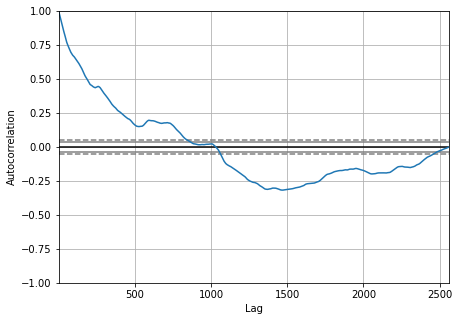

<Figure size 800x560 with 0 Axes>

In [ ]:
# autocorrelation
from pandas.plotting import autocorrelation_plot
rcParams["figure.figsize"] = 7, 5
autocorrelation_plot(series)
plt.figure(figsize=(10, 7), dpi=80)
plt.show() 

MSE with history recalculation

In [ ]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 19.285


Grafical comparing

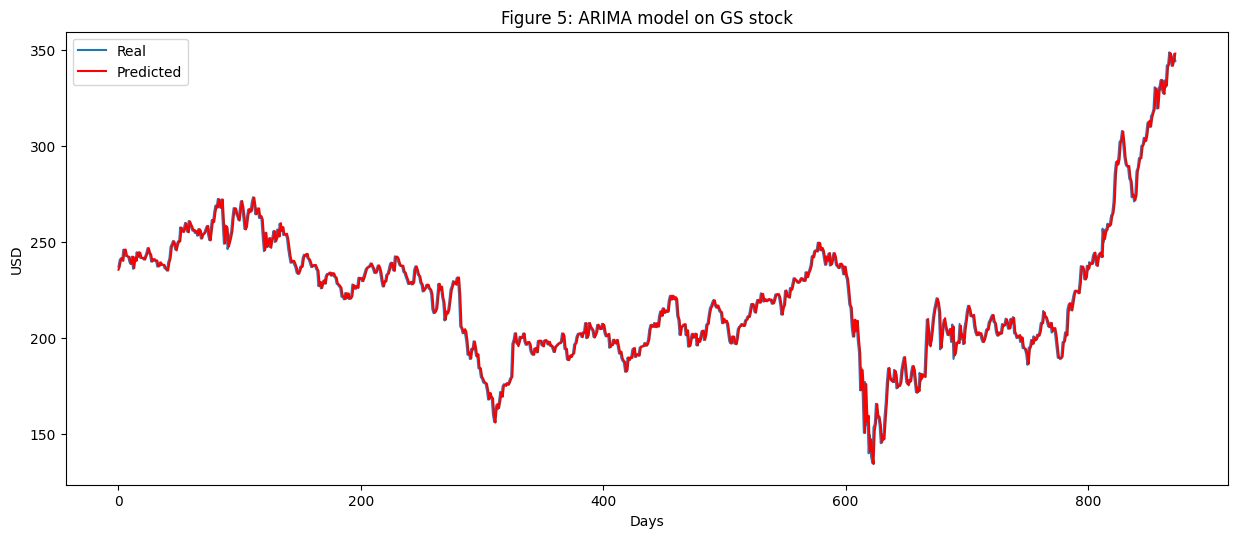

In [ ]:
# Plot the predicted (from ARIMA) and real prices

plt.figure(figsize=(15, 6), dpi=100)
plt.plot(test, label='Real')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Days')
plt.ylabel('USD')
plt.title('Figure 5: ARIMA model on GS stock')
plt.legend()
plt.show()

ARIMA target modeling with depth N

In [ ]:
import statsmodels.api as sm
N=30

modgs = sm.tsa.statespace.SARIMAX(series.values[:-N],
                               order=(0,0,0),seasonal_order=[0,0,0,0], trend='ct',
                               enforce_stationarity=False,
                               enforce_invertibility=False)

results = modgs.fit()
print('ARIMA{} - AIC:{}'.format((0, 0, 0), results.aic))

#print(results.summary().tables[0],results.summary().tables[1])

ARIMA(0, 0, 0) - AIC:24132.839966811178


Ploting forecast

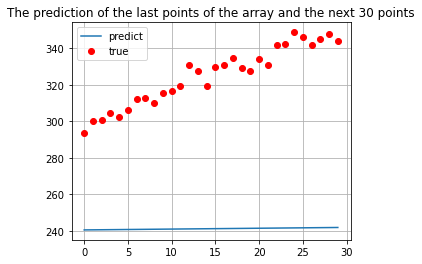

In [ ]:
pred_dynamic = results.forecast(30)

rcParams["figure.figsize"] = 5, 4

plt.plot(pred_dynamic, label='predict' )
# with true points
plt.plot(series.values[-N:],'or',label='true')
plt.title('The prediction of the last points of the array and the next 30 points')
plt.legend()
plt.grid()
plt.plot()
plt.show()

In [ ]:
error = mean_squared_error(series.values[-N:], pred_dynamic)
print('Test MSE: %.3f' % error)

Test MSE: 7256.651


Experimentally selecting the optimal values of the ARIMA parameters (p, d, q)

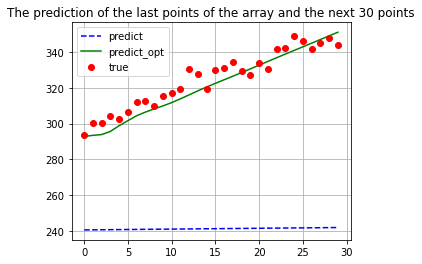

In [ ]:
mod_opt = sm.tsa.statespace.SARIMAX(series.values[:-N],
                               order=[7, 2, 1],seasonal_order=[0,0,0,0],trend='ct',
                               enforce_stationarity=False,
                               enforce_invertibility=False)
results_opt = mod_opt.fit()
pred_dynamic = results.forecast(30)    # making forecast
pred_dynamic_opt = results_opt.forecast(30) 

plt.plot(pred_dynamic,'--b', label='predict' )
plt.plot(pred_dynamic_opt,'g', label='predict_opt' )
# with true points
plt.plot(series.values[-N:],'or',label='true')
plt.title('The prediction of the last points of the array and the next 30 points')
plt.legend()
plt.grid()
plt.show()

In [ ]:
error = mean_squared_error(series.values[-N:], pred_dynamic_opt)
print('Test MSE: %.3f' % error)

Test MSE: 34.836


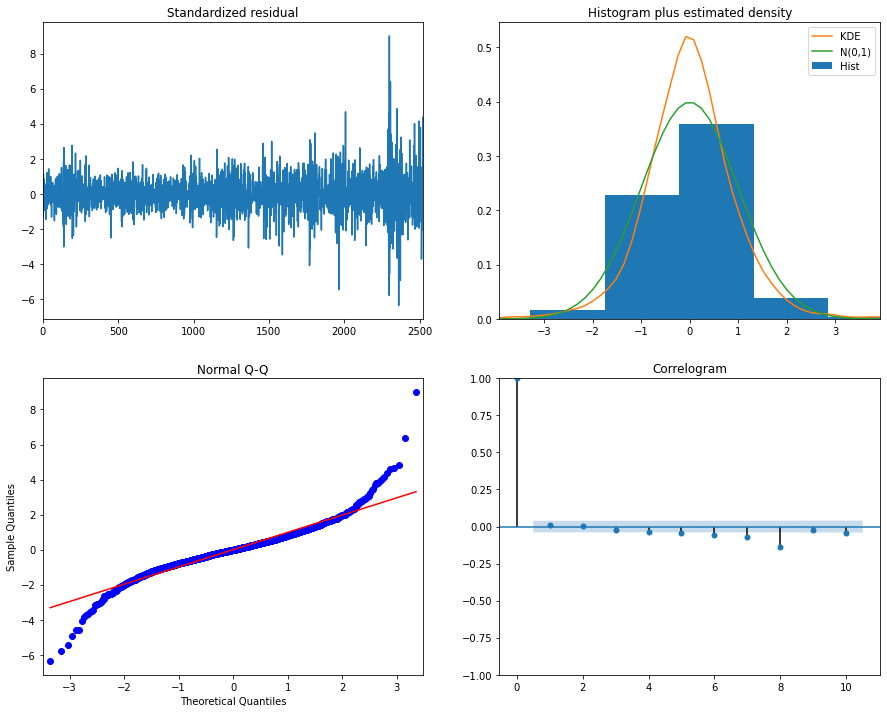

In [ ]:
results_opt.plot_diagnostics(figsize=(15, 12))
plt.show()

In [ ]:
results_opt.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
intercept,0.0068,0.083,0.082,0.934,-0.155,0.169
drift,-5.441e-06,4.54e-05,-0.120,0.905,-9.45e-05,8.36e-05
ar.L1,-0.4626,0.074,-6.243,0.000,-0.608,-0.317
ar.L2,-0.3125,0.072,-4.313,0.000,-0.454,-0.170
ar.L3,-0.3115,0.058,-5.344,0.000,-0.426,-0.197
ar.L4,-0.2741,0.050,-5.482,0.000,-0.372,-0.176
ar.L5,-0.2370,0.043,-5.545,0.000,-0.321,-0.153
ar.L6,-0.1708,0.037,-4.589,0.000,-0.244,-0.098
ar.L7,-0.0247,0.027,-0.923,0.356,-0.077,0.028
ma.L1,-0.5265,0.075,-7.056,0.000,-0.673,-0.380


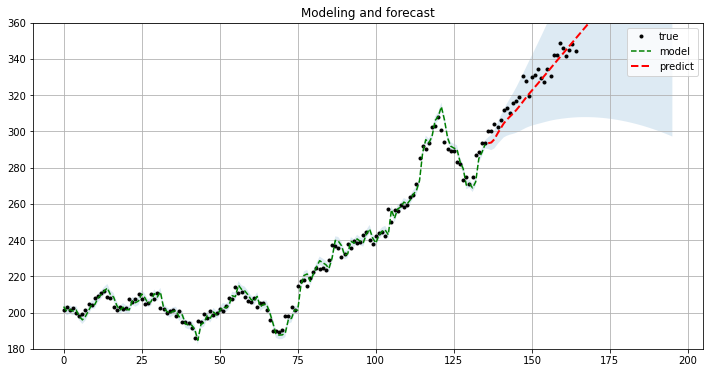

In [ ]:
N=30 # test points
nforecast = N+30  # test+forecast
N3=2400  # vizualization offset
predict_ = results_opt.get_prediction(end=results_opt.nobs + nforecast)   
# getting results

# plotting results
idx = np.arange(len(predict_.predicted_mean)-N3)
predict_ci = predict_.conf_int(alpha=0.5)

#
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(series.values[N3:], 'k.',label='true')
plt.ylim([180,360])
plt.grid()
ax.plot(idx[:-nforecast], predict_.predicted_mean[N3:-nforecast], '--g',label='model')
ax.plot(idx[-nforecast:], predict_.predicted_mean[-nforecast:], 'r--', linestyle='--', linewidth=2,label = 'predict')
ax.fill_between(idx, predict_ci[N3:, 0], predict_ci[N3:, 1], alpha=0.15)
plt.legend()

ax.set(title='Modeling and forecast');

Comparing predicted and true values

In [ ]:
df_preds = pd.DataFrame()
df_preds['preds'] = predict_.predicted_mean[-nforecast+30:-nforecast+35]
df_preds['real'] = [327.39, 330.55, 328.65, 331.77, 339.33]
df_preds['err'] = df_preds['real'] - df_preds['preds']
df_preds['%err'] = df_preds['err']*100 / df_preds['real']
df_preds.head()

,preds,real,err,%err
0,355.232858,327.39,-27.842858,-8.504493
1,357.257530,330.55,-26.707530,-8.079725
2,359.280324,328.65,-30.630324,-9.320044
3,361.301981,331.77,-29.531981,-8.901342
4,363.322208,339.33,-23.992208,-7.070465
